In [3]:
from matplotlib.axes import Axes
from script.packetPreprocessing import *
from script.packetsHandler import *
import decimal
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import gc

In [14]:
del packets,timestamp
gc.collect()

6764076

In [15]:
fileNum=46
packets=readPcap(fileNum)
timestamp=readTimestamp(fileNum*10000)
packets=replaceTimestemp(packets,timestamp)



In [17]:
# packNums1,timestamps1,byteSlots0001, byteRates0001=splitToTimeSlot(packets, 0.0001)
# packNums2, timestamps2,byteSlots0002, byteRates0002 = splitToTimeSlot(packets, 0.0002)
packNums1,timestamps1,byteSlots0001, byteRates0001=splitToTimeSlot(packets, 0.001)


In [18]:
data001=pd.DataFrame({
                  'timestamp':[x for x in range(len(byteSlots0001))],
                  'byterate':list(map(int,byteRates0001)),
                  "packNum":  packNums1
                                 
                   })

data001.to_csv("data_for_0_001s_time_slot.csv",index=False)

# for label in fig.get_xticklabels():
#     if np.int(label.get_text()) % 100 == 0:  
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

In [19]:
# data["timestamp"][len(data)-1]
packets[-1].time

Decimal('1521118800.979713470')

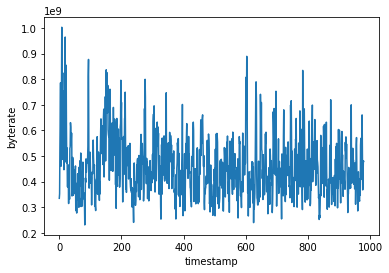

In [20]:
fig=sns.lineplot(x='timestamp',y='byterate',data=data001  )

# xticklabels	List[str]
# xticks

In [21]:
fig.set_xticks(np.arange(0,len(data001),100))
fig.set_xticklabels(np.arange(0,len(data001),100))
# fig.set_size_inches( 30, 10)
# np.arange(0, len(byteRates0001),100)

[Text(-200.0, 0, '0'),
 Text(0.0, 0, '100'),
 Text(200.0, 0, '200'),
 Text(400.0, 0, '300'),
 Text(600.0, 0, '400'),
 Text(800.0, 0, '500'),
 Text(1000.0, 0, '600'),
 Text(1200.0, 0, '700'),
 Text(0, 0, '800'),
 Text(0, 0, '900')]

In [22]:
figure=fig.get_figure()
figure.set_size_inches(30,10)
figure.savefig("byterate_for_0_001s_time_slot")

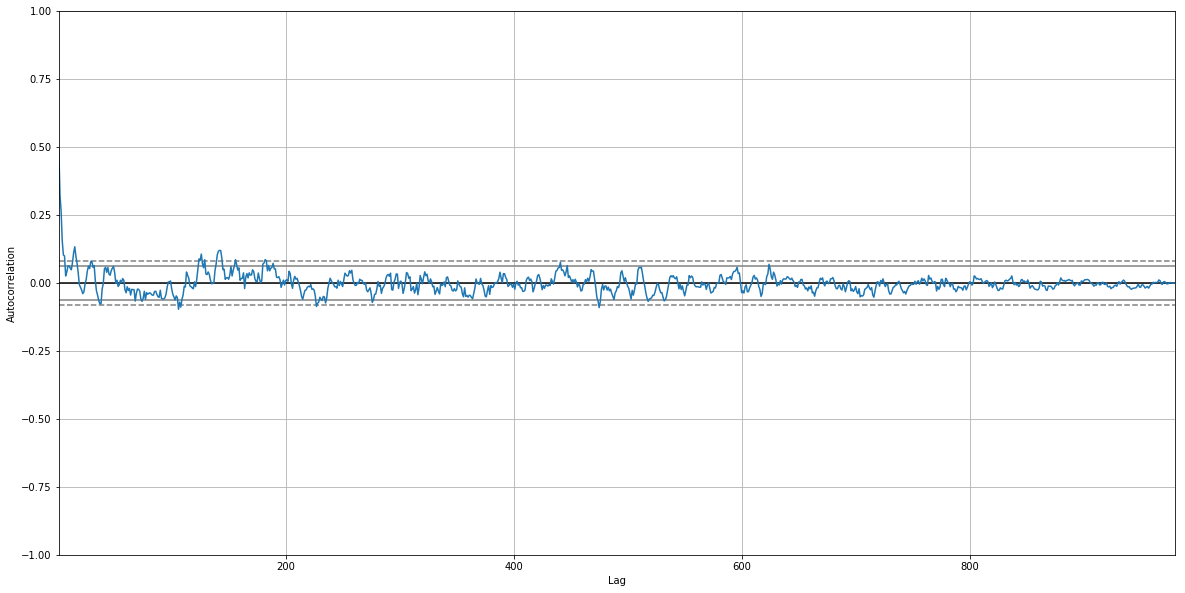

In [23]:
autofig=pd.plotting.autocorrelation_plot(list(map(int,byteRates0001)))
autofig.get_figure().set_size_inches(20,10)
autofig.get_figure().savefig("autocorrelation_plot_0_001")

In [114]:
del fig,figure
gc.collect()

NameError: name 'figure' is not defined

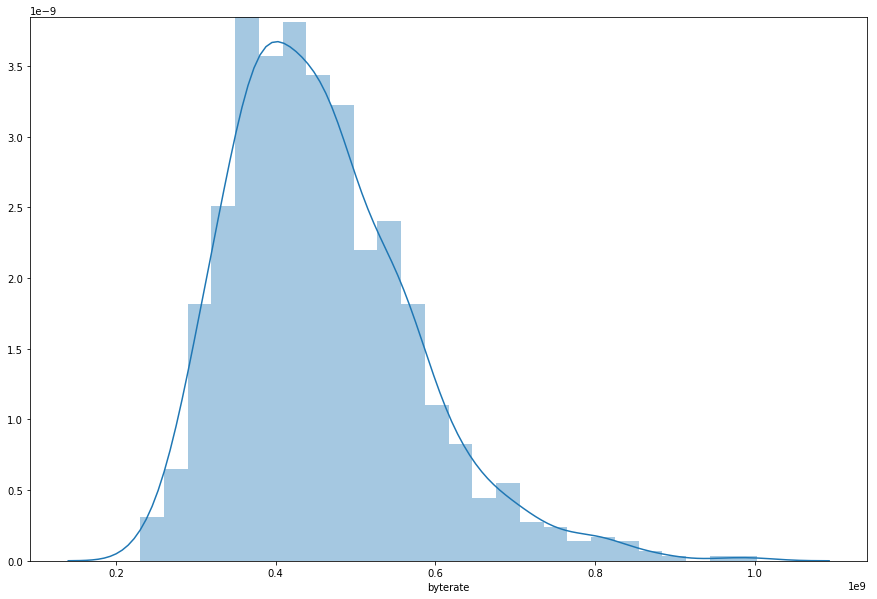

In [24]:
distfig=sns.distplot(data001['byterate'])
distfig.get_figure().set_size_inches(15,10)
distfig.get_figure().savefig("dist_plot_0_001_time_slot")